In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('max_columns',None)
pd.set_option('max_rows',90)
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge , HuberRegressor ,Ridge,OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import metrics
from sklearn .neighbors import KNeighborsRegressor
sns.set_style('darkgrid')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
target=train['SalePrice']
test_Id=test['Id']
train1=train.drop(['Id','SalePrice'],axis=1)
test1=test.drop(['Id'],axis=1)


In [9]:
data1=pd.concat([test1,train1] , axis=0).reset_index(drop=True)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
data1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [11]:
data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007
2915,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010
2916,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010
2917,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,0,112,0,0,0,0,4,2010


In [12]:
data2=data1.copy()

In [13]:
data2['MSSubClass']=data2['MSSubClass'].astype(str)

In [14]:
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'MiscFeature'    
]:
    data2[column]=data2[column].fillna("None")
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st', 
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'Fence',
    'SaleType'
]:
    data2[column]=data2[column].fillna(data2[column].mode()[0])

In [15]:
data2.select_dtypes('object').loc[:,data2.isna().sum()>0].columns




Index([], dtype='object')

In [16]:
data2.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [17]:
data3=data2.copy()

In [18]:
data3.select_dtypes(np.number).isna().sum()


LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [19]:
def knn_impude(df,na_target):
    df=df.copy()
    numeric_df=df.select_dtypes(np.number)
    non_na_columns=numeric_df.loc[:,numeric_df.isna().sum()==0].columns
    y_train=numeric_df.loc[numeric_df[na_target].isna()==False,na_target]
    x_train=numeric_df.loc[numeric_df[na_target].isna()==False,non_na_columns]
    x_test=numeric_df.loc[numeric_df[na_target].isna()==True,non_na_columns]
    y_pred=numeric_df.loc[numeric_df[na_target].isna()==False,na_target]
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    df.loc[df[na_target].isna()==True,na_target]=y_pred
    return df


In [20]:
data3.columns[data3.isna().sum()>0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [21]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath', 
    'GarageYrBlt',
    'GarageCars',
    'GarageArea']:
        data3= knn_impude(data3,column)
        


In [22]:
data3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [23]:
scipy.stats.skew(data3['LotFrontage'])

1.3407511399227512

In [24]:
data3.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007
2915,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010
2916,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188,1152,0,2340,0.0,0.0,2,0,4,1,9,2,1941.0,1.0,252.0,0,60,0,0,0,0,2500,5,2010
2917,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,1078.0,1078,0,0,1078,1.0,0.0,1,0,2,1,5,0,1950.0,1.0,240.0,366,0,112,0,0,0,0,4,2010


In [25]:
data4=data3.copy()

In [26]:
scipy.stats.skew(data4.select_dtypes(np.number))

array([ 1.34075114, 12.8224314 ,  0.19711045,  0.57031205, -0.59980555,
       -0.45102038,  2.60368152,  1.42551624,  4.14611071,  0.91932181,
        1.16280584,  1.46960442,  0.86167475, 12.088761  ,  1.26935769,
        0.62437257,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.75836691,  0.7334946 , -0.34632694, -0.21859252,
        0.24089573,  1.84243281,  2.53511373,  4.00389122, 11.37606468,
        3.9466937 , 16.89832792, 21.94719481,  0.19588394,  0.13239881])

In [27]:
skew_df=pd.DataFrame(data4.select_dtypes(np.number).columns , columns=['feature'])
skew_df['skew']=skew_df['feature'].apply(lambda feature :scipy.stats.skew(data4[feature]))
skew_df['absolute skew']=skew_df['skew'].apply(abs)
skew_df['skewed']=skew_df['absolute skew'].apply(lambda x:True if x>=.5 else False)
skew_df

,feature,skew,absolute skew,skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [28]:
data4[skew_df.query('skewed==True')['feature'].values].describe

<bound method NDFrame.describe of       LotFrontage  LotArea  OverallCond  YearBuilt  MasVnrArea  BsmtFinSF1  \
0            80.0    11622            6       1961         0.0       468.0   
1            81.0    14267            6       1958       108.0       923.0   
2            74.0    13830            5       1997         0.0       791.0   
3            78.0     9978            6       1998        20.0       602.0   
4            43.0     5005            5       1992         0.0       263.0   
...           ...      ...          ...        ...         ...         ...   
2914         62.0     7917            5       1999         0.0         0.0   
2915         85.0    13175            6       1978       119.0       790.0   
2916         66.0     9042            9       1941         0.0       275.0   
2917         68.0     9717            6       1950         0.0        49.0   
2918         75.0     9937            6       1965         0.0       830.0   

      BsmtFinSF2  BsmtUnfSF  

In [29]:
for column in skew_df.query('skewed==True')['feature'].values:
    data4[column]=np.log1p(data4[column])


In [30]:
data4['MoSold']=(-np.cos(0.526*data4['MoSold']))

In [31]:
data5=data4.copy()
data5=pd.get_dummies(data5)
data5.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Fun

In [32]:
data6=data5.copy()

In [33]:
scaler=StandardScaler()
scaler.fit(data6)
data6=pd.DataFrame(scaler.transform(data6) )
data6 = pd.DataFrame(scaler.transform(data6), index=data6.index,columns=data6.columns)

In [34]:
data6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315
0,-10.772828,-16.817512,-4.867416,-8.156764,-513.215254,-95.036161,-1.111368,-1.201606,0.853396,-3.022723,-5.690689,-23.683196,-1.127190,-0.294275,-26.750584,-3.209595,-1.754103,-4.694312,-3.003545,-4.748668,-10.33496,-14.169758,-3.484337,-78.330424,-3.643005,-2.190663,-0.573121,-1.586064,-0.668880,-0.304898,1.730268,-0.229312,-0.342014,0.969196,-1525.864472,-1.324365,-1.018855,-1.260015,-1.082396,-1.167438,1.939507,-1.273607,-1.047444,-1.084975,-1.439258,-1.740592,-1.260015,-1.09706,-1.247378,-1.146021,-1.235742,-1.101582,-1.273607,112.174430,-6.359129,-1.619581,-1.068377,-14.560254,-1.249929,-2.63431,-1.193151,-2.200539,-1.190233,-1.079751,0.245898,-1.246098,-1.249929,-1.165853,-1.857970,-53.018173,-1.018855,-1.672871,-1.317468,-1.203178,-1.07424,-0.278848,-3.387952,-1.256254,-1.079751,-1.108099,-1.062069,-1.112287,-1.234432,-1.139015,-1.417978,-1.227827,-1.338012,-1.304684,-1.214316,-1.126145,-1.24224,6.166178,-1.09706,-1.263752,-1.182821,-1.305854,-1.387808,-1.146021,-1.288116,-1.256254,-1.324365,-1.151133,-1.184317,-1.09934,-1.212941,17.554797,-9.635220,-1.089959,-1.12991,-1.108099,-1.149442,-1.047444,-1.058706,-1.043139,-1.071358,-8.802872,-1.038416,-1.038416,-1.018855,-1.018855,-1.02687,-1.011894,-1.169014,-1.235742,-1.218415,-1.374710,-1.467722,-1.087494,0.976454,-1.055171,-1.09934,-2.078668,-1.200341,-1.260015,-1.089959,-0.683953,-1.094738,-1.715061,-1.065286,-1.043139,-1.018855,-7.163295,-1.018855,-1.018855,-1.018855,-1.09706,-1.058706,-1.051433,-1.139015,-1.02687,-1.047444,-1.205993,-1.02687,-1.257510,-1.600865,-1.018855,-1.609179,-1.368116,-1.02687,-1.137227,2.108825,-1.568691,-1.159417,-1.128037,-1.038416,-1.094738,-1.14429,-1.033104,-1.257510,-1.563505,-1.077035,-1.606061,-1.018855,-1.421183,-1.047444,-1.14429,2.145733,-1.547946,-1.197483,-1.101582,-2.087299,0.415287,-1.398641,-1.233118,-1.122299,-2.215019,0.357009,-1.068377,-1.176764,-1.451942,-1.033104,-1.430854,-1.464572,1.507191,-2.712983,-1.147738,-1.065286,-1.043139,-1.408334,-1.207392,-2.547861,-1.197483,1.389569,-1.229156,-1.252468,-1.198915,-1.043139,-1.765352,-1.575952,-1.427578,-1.387808,0.163467,-1.198915,-1.587366,-1.420115,-2.050571,-1.291697,-1.194601,9.804563,-2.052998,-1.152813,-1.17829,-1.120344,33.376452,-1.196045,-1.230480,-9.271227,-1.018855,-6.976005,-1.10596,-1.058706,-1.02687,-1.047444,-3.070207,-1.212941,-1.634166,-1.033104,2.761385,-1.340269,-2.655333,-1.331212,-1.149442,-1.055171,-1.018855,-2.196604,-1.350369,-1.181318,-2.457875,0.931901,-1.087494,-1.058706,-1.173689,-1.181318,-1.122299,-1.02687,-2.613583,-1.137227,-1.187288,-1.926936,1.082341,-1.142546,-1.758790,-1.09706,0.493873,-1.124232,-1.328935,-1.077035,-1.967358,-1.29526,-1.898498,-1.297627,-2.004987,1.519800,-1.033104,-1.254995,-1.09934,-1.297627,-1.043139,-1.754213,-1.033104,-1.187288,-1.077035,-1.297627,-1.07424,-2.064814,-1.362597,-1.169014,-

AttributeError: 'Rectangle' object has no property 'fit'

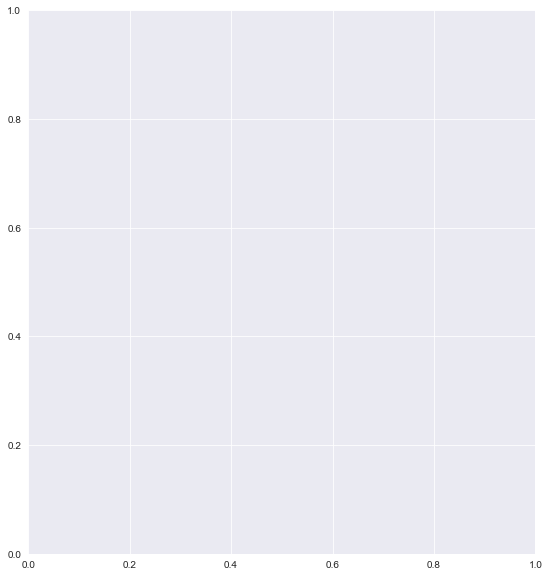

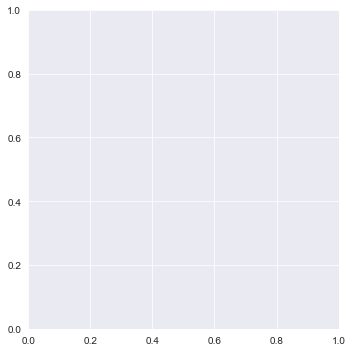

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.displot(target ,kde=True , fit=scipy.stats.norm)
plt.tite('whithout log transform')
plt.subplot(1,2,2)
sns.displot(np.log(target) ,kde=True ,fit=scipy.stats.norm)
plt.show()

In [37]:
log_target=np.log(target)

In [38]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [39]:
data7=data6.copy()

In [41]:
train_final=data7.loc[:train.index.max(),:]
test_final=data7.loc[:train.index.max()+1,:]

In [43]:
data8=pd.concat([train_final,target],axis=1)

In [44]:
data8


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,SalePrice
0,-10.772828,-16.817512,-4.867416,-8.156764,-513.215254,-95.036161,-1.111368,-1.201606,0.853396,-3.022723,-5.690689,-23.683196,-1.127190,-0.294275,-26.750584,-3.209595,-1.754103,-4.694312,-3.003545,-4.748668,-10.33496,-14.169758,-3.484337,-78.330424,-3.643005,-2.190663,-0.573121,-1.586064,-0.66888,-0.304898,1.730268,-0.229312,-0.342014,0.969196,-1525.864472,-1.324365,-1.018855,-1.260015,-1.082396,-1.167438,1.939507,-1.273607,-1.047444,-1.084975,-1.439258,-1.740592,-1.260015,-1.09706,-1.247378,-1.146021,-1.235742,-1.101582,-1.273607,112.174430,-6.359129,-1.619581,-1.068377,-14.560254,-1.249929,-2.63431,-1.193151,-2.200539,-1.190233,-1.079751,0.245898,-1.246098,-1.249929,-1.165853,-1.857970,-53.018173,-1.018855,-1.672871,-1.317468,-1.203178,-1.07424,-0.278848,-3.387952,-1.256254,-1.079751,-1.108099,-1.062069,-1.112287,-1.234432,-1.139015,-1.417978,-1.227827,-1.338012,-1.304684,-1.214316,-1.126145,-1.242240,6.166178,-1.09706,-1.263752,-1.182821,-1.305854,-1.387808,-1.146021,-1.288116,-1.256254,-1.324365,-1.151133,-1.184317,-1.09934,-1.212941,17.554797,-9.635220,-1.089959,-1.12991,-1.108099,-1.149442,-1.047444,-1.058706,-1.043139,-1.071358,-8.802872,-1.038416,-1.038416,-1.018855,-1.018855,-1.02687,-1.011894,-1.169014,-1.235742,-1.218415,-1.374710,-1.467722,-1.087494,0.976454,-1.055171,-1.09934,-2.078668,-1.200341,-1.260015,-1.089959,-0.683953,-1.094738,-1.715061,-1.065286,-1.043139,-1.018855,-7.163295,-1.018855,-1.018855,-1.018855,-1.09706,-1.058706,-1.051433,-1.139015,-1.02687,-1.047444,-1.205993,-1.02687,-1.257510,-1.600865,-1.018855,-1.609179,-1.368116,-1.02687,-1.137227,2.108825,-1.568691,-1.159417,-1.128037,-1.038416,-1.094738,-1.14429,-1.033104,-1.257510,-1.563505,-1.077035,-1.606061,-1.018855,-1.421183,-1.047444,-1.14429,2.145733,-1.547946,-1.197483,-1.101582,-2.087299,0.415287,-1.398641,-1.233118,-1.122299,-2.215019,0.357009,-1.068377,-1.176764,-1.451942,-1.033104,-1.430854,-1.464572,1.507191,-2.712983,-1.147738,-1.065286,-1.043139,-1.408334,-1.207392,-2.547861,-1.197483,1.389569,-1.229156,-1.252468,-1.198915,-1.043139,-1.765352,-1.575952,-1.427578,-1.387808,0.163467,-1.198915,-1.587366,-1.420115,-2.050571,-1.291697,-1.194601,9.804563,-2.052998,-1.152813,-1.17829,-1.120344,33.376452,-1.196045,-1.23048,-9.271227,-1.018855,-6.976005,-1.10596,-1.058706,-1.02687,-1.047444,-3.070207,-1.212941,-1.634166,-1.033104,2.761385,-1.340269,-2.655333,-1.331212,-1.149442,-1.055171,-1.018855,-2.196604,-1.350369,-1.181318,-2.457875,0.931901,-1.087494,-1.058706,-1.173689,-1.181318,-1.122299,-1.02687,-2.613583,-1.137227,-1.187288,-1.926936,1.082341,-1.142546,-1.758790,-1.09706,0.493873,-1.124232,-1.328935,-1.077035,-1.967358,-1.295260,-1.898498,-1.297627,-2.004987,1.519800,-1.033104,-1.254995,-1.09934,-1.297627,-1.043139,-1.754213,-1.033104,-1.187288,-1.077035,-1.297627,-1.07424,-2.064814,-1.362597,-

In [66]:
corr = data8.corr()
corr.shape

(317, 317)

In [69]:
mlr = LinearRegression()

In [65]:
mlr.fit(train_final,target)

AttributeError: 'DataFrame' object has no attribute 'fit'

In [64]:
y_train_predicted =mlr.predict(test_final)

AttributeError: 'DataFrame' object has no attribute 'predict'

In [61]:
y_train_predicted = pd.DataFrame(pred,columns=['SalePrice'])
sub = pd.concat([final['Id'],pred],axis=1)

sub.set_index('Id',inplace=True)
sub.to_csv("prediction.csv")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [56]:
sub.to_csv("prediction2.csv")